In [1]:
# Dependencies to Visualize the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

In [2]:
# Filepaths, numpy, and Tensorflow
import os
import numpy as np
import tensorflow as tf

/anaconda2/envs/ut_ml/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [3]:
# Keras
from keras.models import Sequential
from keras.utils import to_categorical, np_utils
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.datasets import mnist

Using TensorFlow backend.


### Load MNIST Data

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training Data Info")
print("Training Data Shape:", X_train.shape)
print("Training Data Labels Shape:", y_train.shape)

Training Data Info
Training Data Shape: (60000, 28, 28)
Training Data Labels Shape: (60000,)


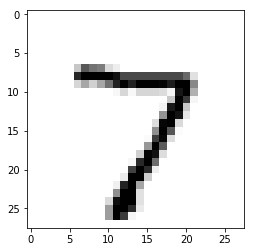

In [7]:
# Plot the first image from the dataset
plt.imshow(X_test[0,:,:], cmap=plt.cm.Greys)

In [8]:
X_train = X_train.astype('float32')
X_train /= 255.
X_test = X_test.astype('float32')
X_test /= 255.

In [9]:
X_train.shape

(60000, 28, 28)

In [11]:
#reshape input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [12]:
y_test[:]

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [13]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
labels=range(10)

In [14]:
y_test[:2]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
# build model
model = Sequential()
model.add(Conv2D(32,
    (3, 3),
    input_shape=(28, 28,1),
    activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])


model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.1491 - acc: 0.9553 - val_loss: 0.0658 - val_acc: 0.9788
Epoch 2/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0510 - acc: 0.9844 - val_loss: 0.0471 - val_acc: 0.9835
Epoch 3/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.0332 - acc: 0.9894 - val_loss: 0.0401 - val_acc: 0.9867
Epoch 4/10
60000/60000 [==============================] - 16s 267us/step - loss: 0.0210 - acc: 0.9935 - val_loss: 0.0482 - val_acc: 0.9850
Epoch 5/10
60000/60000 [==============================] - 16s 267us/step - loss: 0.0144 - acc: 0.9956 - val_loss: 0.0379 - val_acc: 0.9877
Epoch 6/10
60000/60000 [==============================] - 22s 374us/step - loss: 0.0105 - acc: 0.9965 - val_loss: 0.0457 - val_acc: 0.9

In [16]:
model.save("cnn.h5")

In [17]:
from keras.models import load_model
model = load_model("cnn.h5")

In [18]:
model_loss, model_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 196us/step


In [19]:
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.06497804381973452, Accuracy: 0.9852


In [20]:
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array

def test_image(filepath):
    image_size = (28, 28)
    im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
    im = img_to_array(im)
    im /= 255
    im = 1 - im
    im = im.reshape(1, 28, 28, 1)
    plt.imshow(im.reshape(28, 28), cmap=plt.cm.Greys)
    predicted = model.predict_classes(im)
    print("Predicted: ", predicted[0])

Predicted:  2


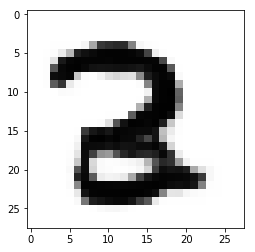

In [21]:
test_image("../Images/2_or_3.png")